In [1]:
# === Section 1: 导入库与参数设置 ===
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Jupyter 默认会自动 inline 显示图，但为了稳妥可手动启用
# %matplotlib inline

# 文件路径（改成你的 CSV 所在位置）
CSV_PATH = "PDFEinfo_UTF8_v7.csv"

# 输出图片目录
FIG_DIR = Path("./figs_session1")
FIG_DIR.mkdir(exist_ok=True, parents=True)

# Session 1 需要分析的 5 个变量
TARGET_COLS = [
    "Session 1 - numbers of FoG episodes (n)",
    "Session 1 - total time in FoG (s)",
    "Session 1 - FoG ratio (score)",
    "Session 1 - UPDRS-II (score)",
    "Session 1 - UPDRS-III (score)",
]


In [2]:
# === Section 2: 读取 CSV -> full_data ===
full_data = pd.read_csv(CSV_PATH, na_values=["-", "NA", "N/A", "", " "])

# 规范化列名：去换行、合并多空格、去首尾空格
full_data.columns = (full_data.columns
                     .str.replace(r"\s+", " ", regex=True)
                     .str.replace("\n", " ")
                     .str.strip())

# 去掉空 ID 行
if "ID" in full_data.columns:
    full_data = full_data[full_data["ID"].notna()].reset_index(drop=True)

print(f"✅ 已读取 full_data：{len(full_data)} 行, {len(full_data.columns)} 列。")
print("示例列名前10个：", list(full_data.columns[:10]))


✅ 已读取 full_data：35 行, 71 列。
示例列名前10个： ['ID', 'Age', 'Weight (kg)', 'Height (m)', 'Gender', 'Disease duration (years)', 'Handedness', 'More affected side', 'L-Dopa equivalent units (mg•day-1)', 'sessions #']


In [3]:
# === Section 3: 提取 Session 1 的数据子集 ===
use_cols = [c for c in TARGET_COLS if c in full_data.columns]
if len(use_cols) < len(TARGET_COLS):
    missing = set(TARGET_COLS) - set(use_cols)
    print("⚠️ 以下列在 CSV 中未找到：", missing)

session1 = full_data[use_cols].copy()
session1 = session1.apply(pd.to_numeric, errors="coerce")

print(f"✅ 已提取 session1，包含 {len(session1)} 行、{len(use_cols)} 列。")
session1.head()


✅ 已提取 session1，包含 35 行、5 列。


,Session 1 - numbers of FoG episodes (n),Session 1 - total time in FoG (s),Session 1 - FoG ratio (score),Session 1 - UPDRS-II (score),Session 1 - UPDRS-III (score)
0,4.0,115.10,43.34,6.0,16.0
1,4.0,107.59,44.84,8.0,40.0
2,1.0,1.27,8.15,7.0,27.0
3,8.0,17.02,15.13,4.0,27.0
4,5.0,11.87,6.63,4.0,12.0


In [4]:
# === Section 4: 定义绘图函数 ===
def plot_hist_and_box(series: pd.Series, title_base: str, save_prefix: str, fig_dir: Path):
    """为一个数值序列绘制直方图和箱线图（显示 + 保存 PNG）"""
    s = series.dropna()
    if s.empty:
        print(f"⚠️ {title_base} 无有效数据，跳过。")
        return

    # 直方图：FoG 次数为整数，用整数桶；其余默认10桶
    if "numbers of FoG episodes" in series.name:
        vmax = int(np.nanmax(s))
        bins = range(0, vmax + 2)
    else:
        bins = 10

    # --- Histogram ---
    plt.figure()
    plt.hist(s, bins=bins)
    plt.title(f"Distribution of {title_base}")
    plt.xlabel(title_base)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    hist_path = fig_dir / f"{save_prefix}_hist.png"
    plt.savefig(hist_path, bbox_inches="tight", dpi=150)
    plt.show()

    # --- Boxplot ---
    plt.figure()
    plt.boxplot(s, vert=True)
    plt.title(f"Boxplot of {title_base}")
    plt.ylabel(title_base)
    plt.grid(alpha=0.3)
    box_path = fig_dir / f"{save_prefix}_box.png"
    plt.savefig(box_path, bbox_inches="tight", dpi=150)
    plt.show()

    print(f"✅ 已保存：{hist_path.name}, {box_path.name}")

# 指标名称映射（显示更简洁）
pretty_name = {
    "Session 1 - numbers of FoG episodes (n)": "FoG Episodes (n)",
    "Session 1 - total time in FoG (s)": "Total FoG Time (s)",
    "Session 1 - FoG ratio (score)": "FoG Ratio (%)",
    "Session 1 - UPDRS-II (score)": "UPDRS-II (score)",
    "Session 1 - UPDRS-III (score)": "UPDRS-III (score)",
}


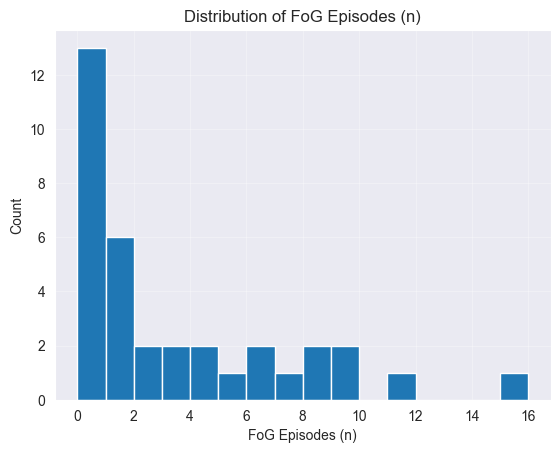

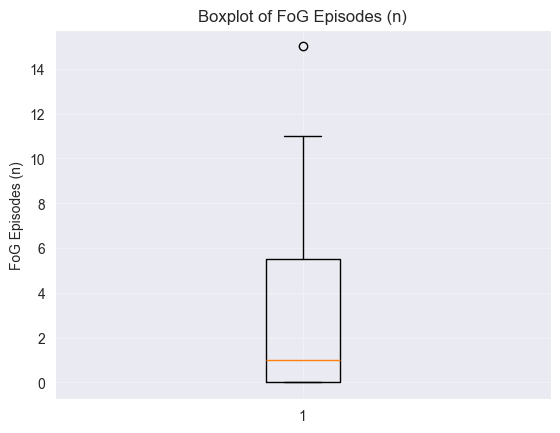

✅ 已保存：session1_fog_episodes_n_hist.png, session1_fog_episodes_n_box.png


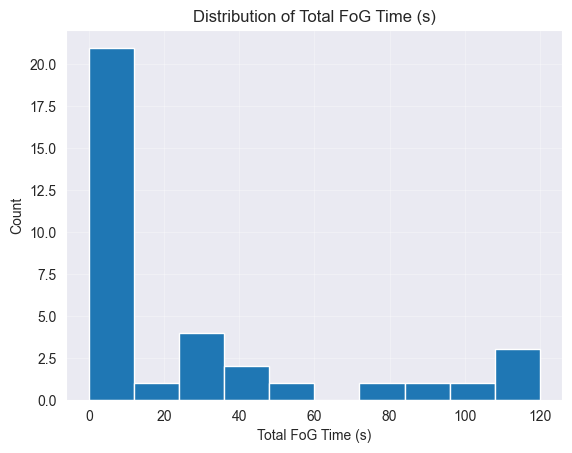

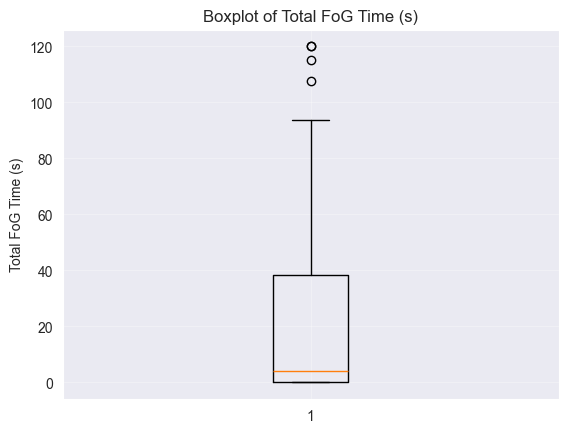

✅ 已保存：session1_total_fog_time_s_hist.png, session1_total_fog_time_s_box.png


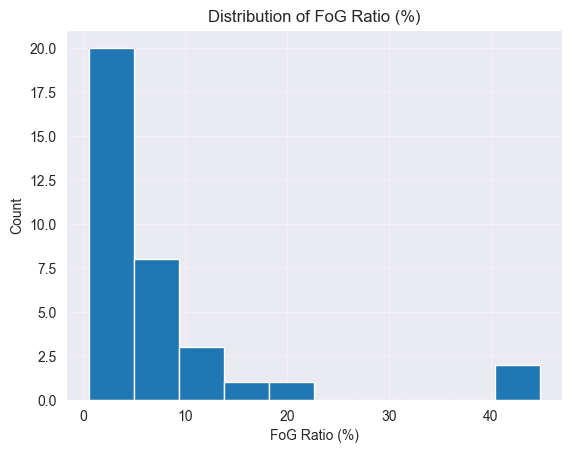

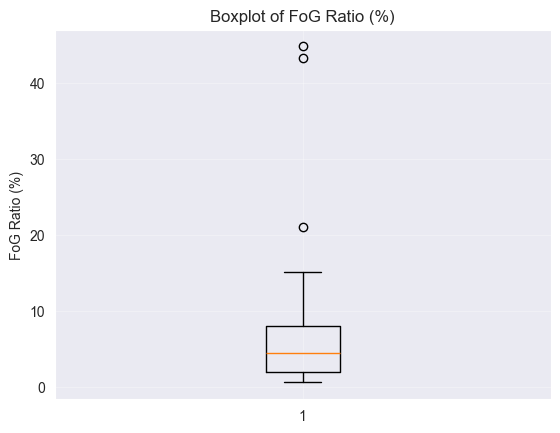

✅ 已保存：session1_fog_ratio_hist.png, session1_fog_ratio_box.png


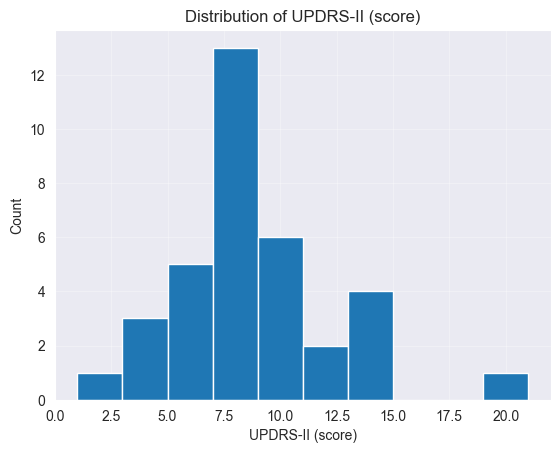

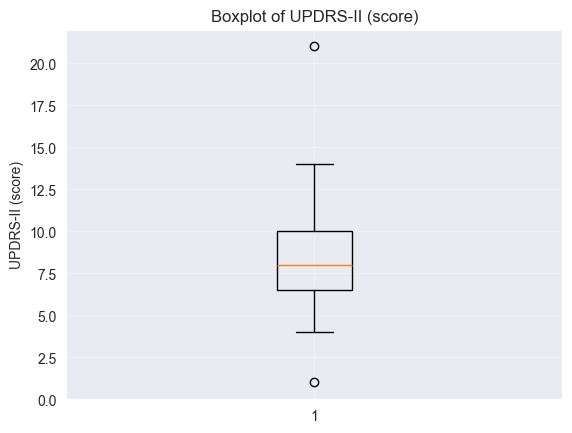

✅ 已保存：session1_updrs_ii_score_hist.png, session1_updrs_ii_score_box.png


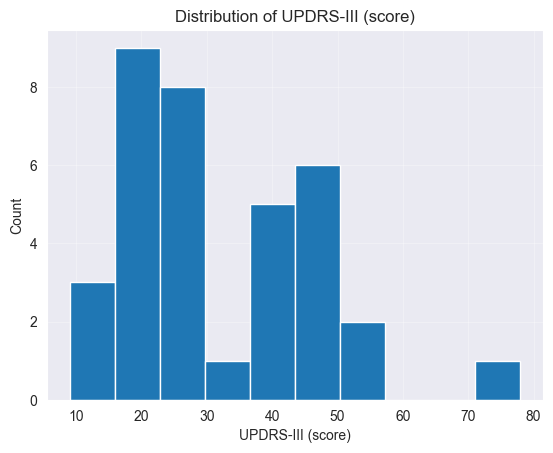

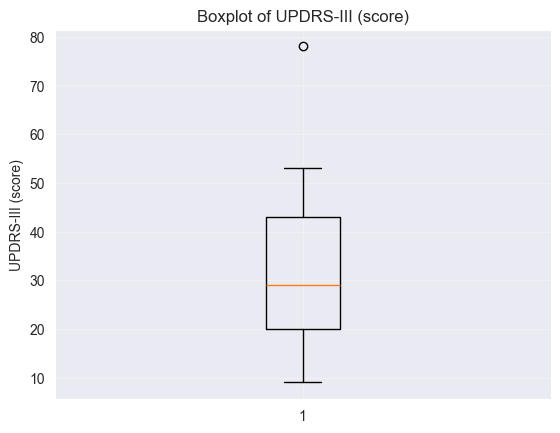

✅ 已保存：session1_updrs_iii_score_hist.png, session1_updrs_iii_score_box.png

=== 数值摘要 ===


,metric,count,missing,mean,median,min,max
0,FoG Episodes (n),35,0,3.085714,1.00,0.00,15.00
1,Total FoG Time (s),35,0,27.216571,3.98,0.00,120.00
2,FoG Ratio (%),35,0,7.583143,4.43,0.55,44.84
3,UPDRS-II (score),35,0,8.542857,8.00,1.00,21.00
4,UPDRS-III (score),35,0,31.828571,29.00,9.00,78.00


In [5]:
# === Section 5: 绘制所有分布图 & 数值摘要 ===

# 绘图（Notebook 显示 + 自动保存）
for col in use_cols:
    title = pretty_name.get(col, col.replace("Session 1 - ", ""))
    save_prefix = "session1_" + re.sub(r"[^A-Za-z0-9_]+", "_", title).strip("_").lower()
    plot_hist_and_box(session1[col], title, save_prefix, FIG_DIR)

# === 数值摘要（均值/中位数/最小/最大/缺失） ===
print("\n=== 数值摘要 ===")
rows = []
for col in use_cols:
    s = session1[col]
    rows.append({
        "metric": pretty_name.get(col, col),
        "count": int(s.count()),
        "missing": int(s.isna().sum()),
        "mean": float(s.mean(skipna=True)) if s.count() else np.nan,
        "median": float(s.median(skipna=True)) if s.count() else np.nan,
        "min": float(s.min(skipna=True)) if s.count() else np.nan,
        "max": float(s.max(skipna=True)) if s.count() else np.nan,
    })
summary_tbl = pd.DataFrame(rows)
summary_tbl
